In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
df = pd.read_excel("cleaned_file.xlsx")

# Display basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2413 entries, 0 to 2412
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Place ID       2413 non-null   int64  
 1   Visit Link     2413 non-null   object 
 2   Place Name     2413 non-null   object 
 3   Image Link     2413 non-null   object 
 4   Description    2412 non-null   object 
 5   Package        2413 non-null   int64  
 6   Rating         2413 non-null   float64
 7   Best time      2413 non-null   object 
 8   city           2413 non-null   object 
 9   state          2413 non-null   object 
 10  Predicted_Tag  2413 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 207.5+ KB
None


In [2]:
df.columns

Index(['Place ID', 'Visit Link', 'Place Name', 'Image Link', 'Description',
       'Package', 'Rating', 'Best time', 'city', 'state', 'Predicted_Tag'],
      dtype='object')

In [2]:
#Statiscial Description
df.describe()

,Place ID,Package,Rating
count,2.413000e+03,2413.000000,2413.000000
mean,3.402199e+05,7434.142976,4.107646
std,5.157969e+05,3489.364594,0.416023
min,1.013000e+03,1199.000000,2.800000
25%,2.847000e+03,5500.000000,3.900000
50%,1.209460e+05,7434.000000,4.200000
75%,1.251510e+05,8000.000000,4.400000
max,1.271908e+06,35498.000000,5.000000


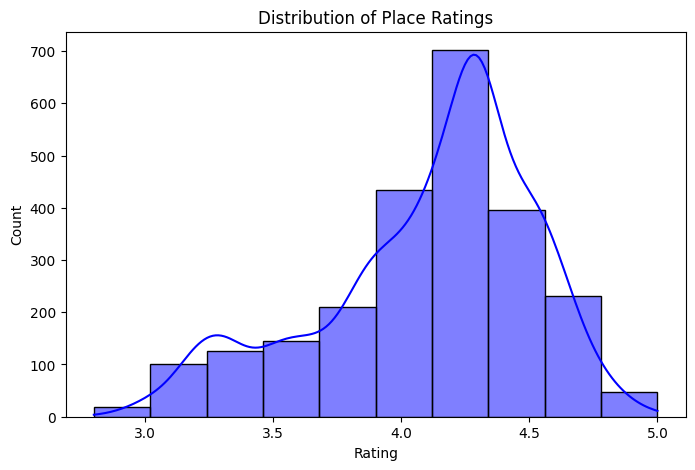

In [3]:
# Rating distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Rating"], bins=10, kde=True, color="blue")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Place Ratings")
plt.show()


Most travel places have ratings between 4.0 and 5.0, meaning people are generally happy with their experiences.
There are very few low-rated places, indicating most locations provide a good experience.

C:\Users\HP00154\AppData\Local\Temp\ipykernel_2284\2466606753.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Best time"], order=df["Best time"].value_counts().index, palette="coolwarm")


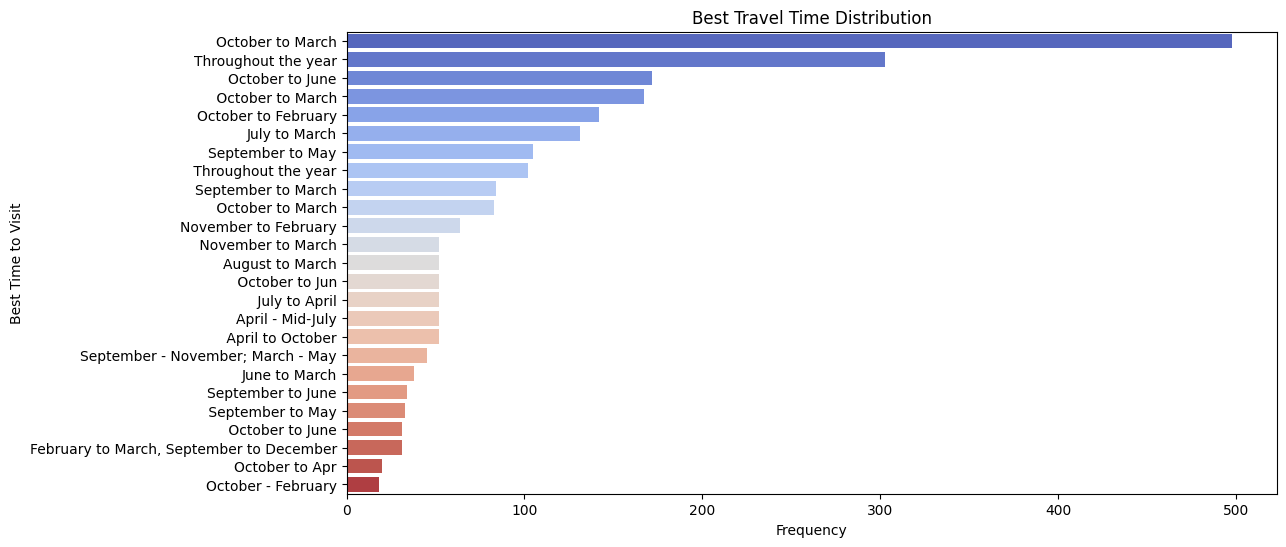

In [4]:
# Best time to visit (Frequency of months)
plt.figure(figsize=(12, 6))
sns.countplot(y=df["Best time"], order=df["Best time"].value_counts().index, palette="coolwarm")
plt.xlabel("Frequency")
plt.ylabel("Best Time to Visit")
plt.title("Best Travel Time Distribution")
plt.show()


Certain months are more popular than others for traveling.
If more places are best visited from October to March, it may be due to better weather or special events.


C:\Users\HP00154\AppData\Local\Temp\ipykernel_2284\2303605508.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tag_counts.values, y=tag_counts.index, palette="magma")


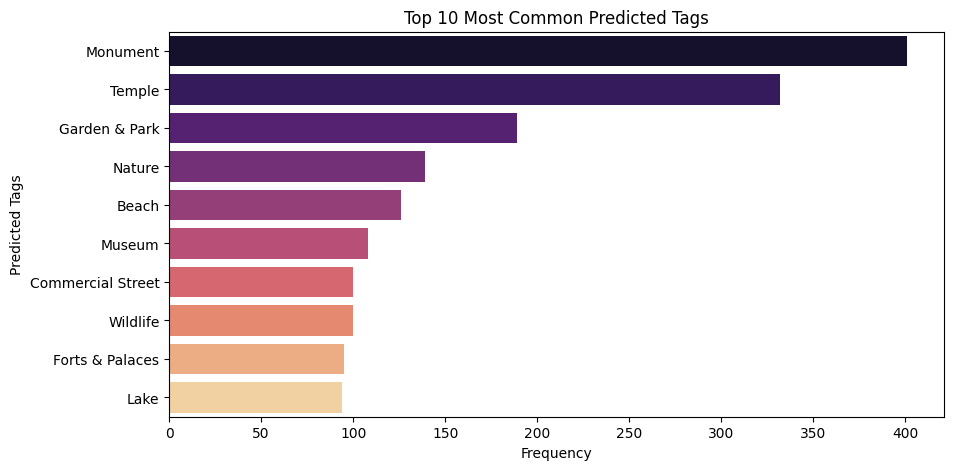

In [6]:
# Top 10 Most Frequent Predicted Tags
plt.figure(figsize=(10, 5))
tag_counts = df["Predicted_Tag"].dropna().explode().value_counts().nlargest(10)
sns.barplot(x=tag_counts.values, y=tag_counts.index, palette="magma")
plt.xlabel("Frequency")
plt.ylabel("Predicted Tags")
plt.title("Top 10 Most Common Predicted Tags")
plt.show()


The most common tags include Adventure, Beach, Heritage, Nature, etc.
This means most travelers are interested in these categories.

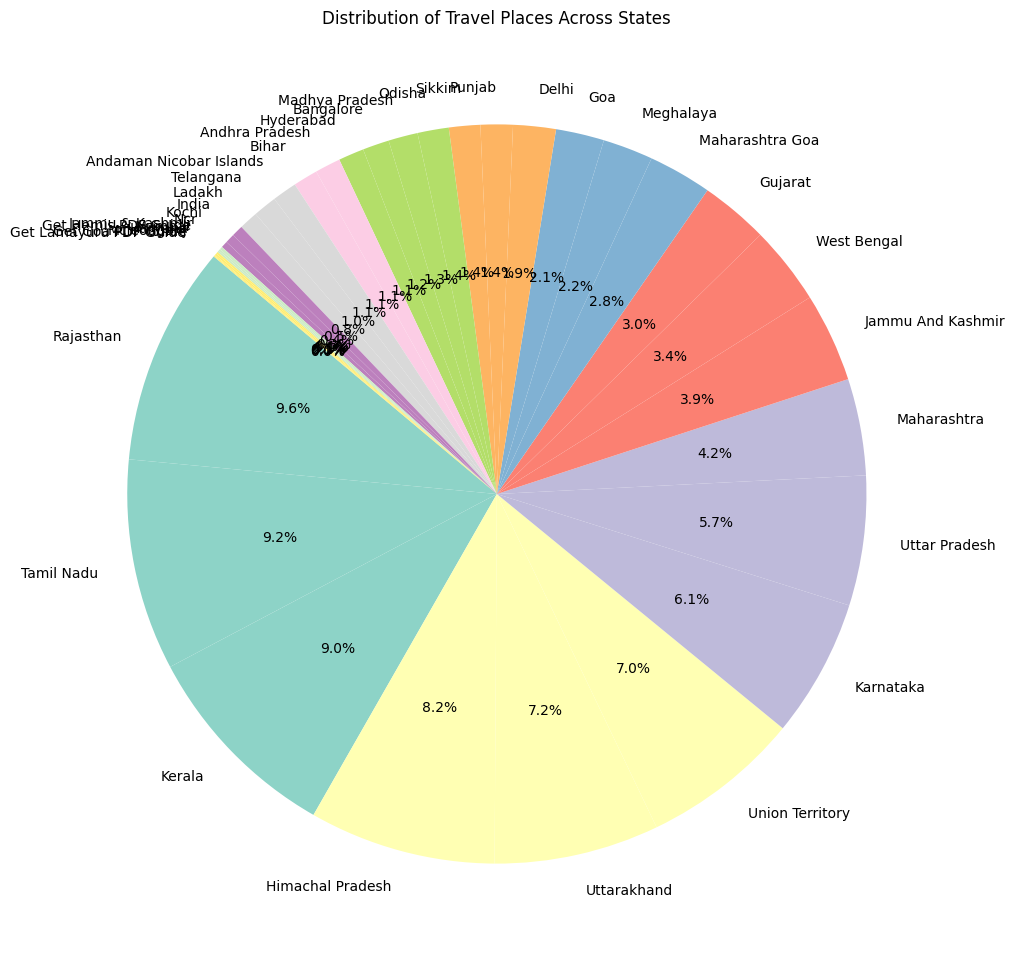

In [14]:
#Pie Chart - Distribution of Places Across States
plt.figure(figsize=(45, 12))
df["state"].value_counts().plot.pie(autopct='%1.1f%%', cmap="Set3", startangle=140)
plt.ylabel("")
plt.title("Distribution of Travel Places Across States")
plt.show()


Some states have a much higher share of travel destinations.
States like Rajasthan, Maharashtra, and Uttarakhand have more tourist places, while some states have fewer.

C:\Users\HP00154\AppData\Local\Temp\ipykernel_2284\3613122038.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="state", y="Rating", data=df, palette="coolwarm")


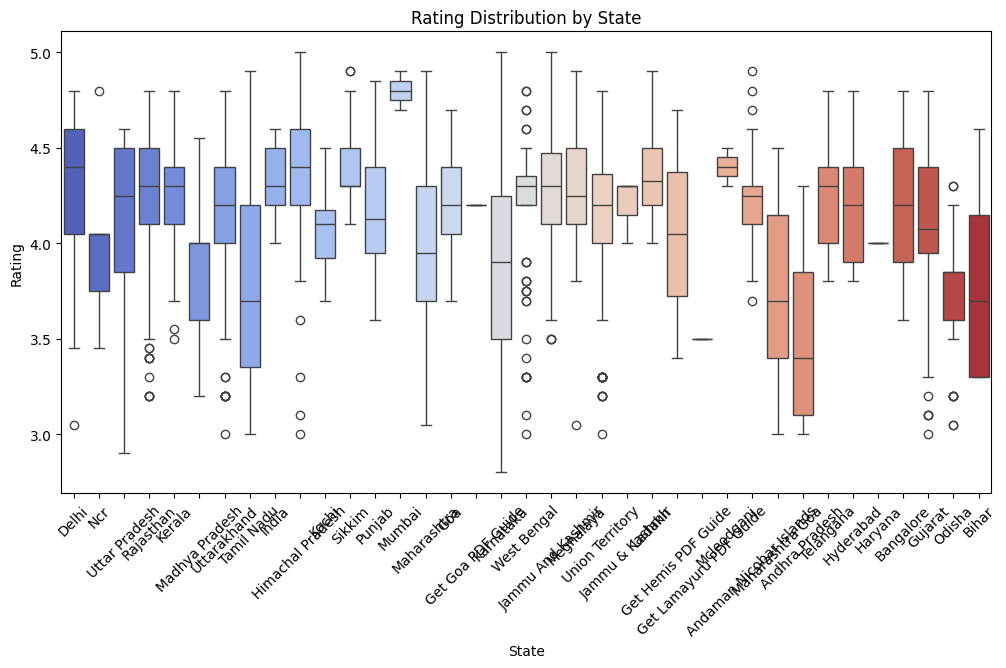

In [15]:
#Box Plot - Rating Distribution by State
plt.figure(figsize=(12, 6))
sns.boxplot(x="state", y="Rating", data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("Rating")
plt.title("Rating Distribution by State")
plt.show()

Some states consistently have higher-rated travel destinations.
If a state has a low median rating, it means many places there have average reviews.

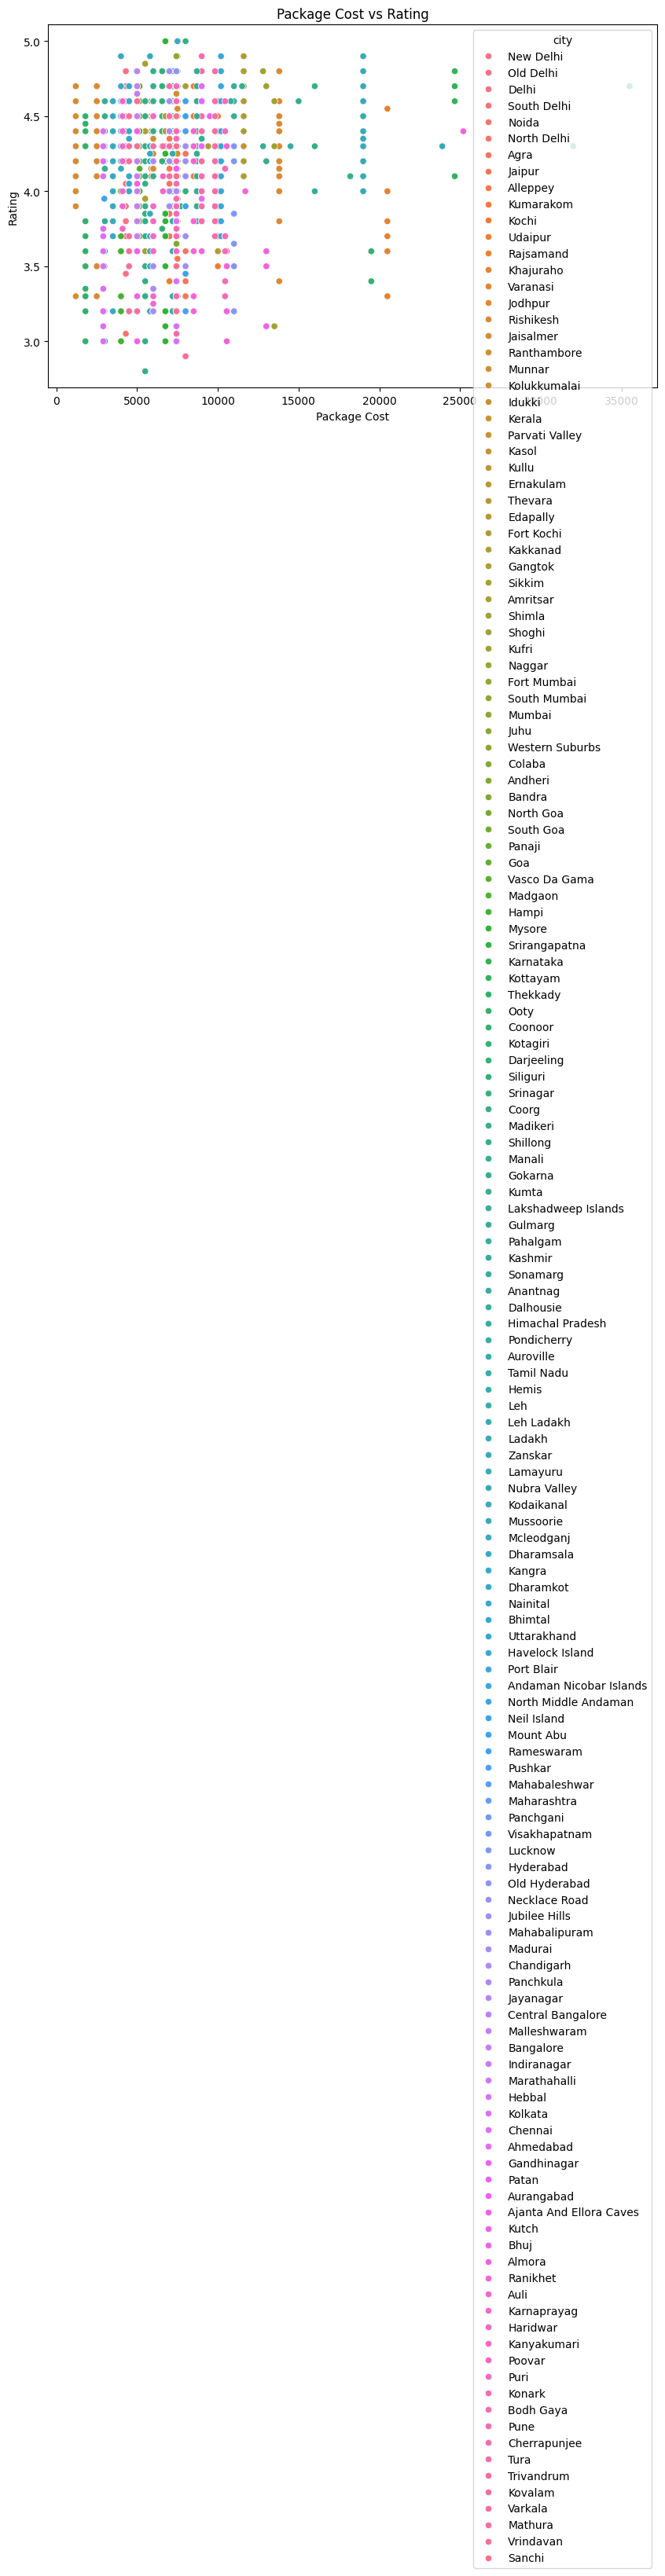

In [16]:
#Scatter Plot - Rating vs Package Cost
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Package", y="Rating", data=df, hue="city", palette="husl")
plt.xlabel("Package Cost")
plt.ylabel("Rating")
plt.title("Package Cost vs Rating")
plt.show()

Higher-priced travel packages sometimes have better ratings, but not always.
Some budget-friendly places still have great ratings.

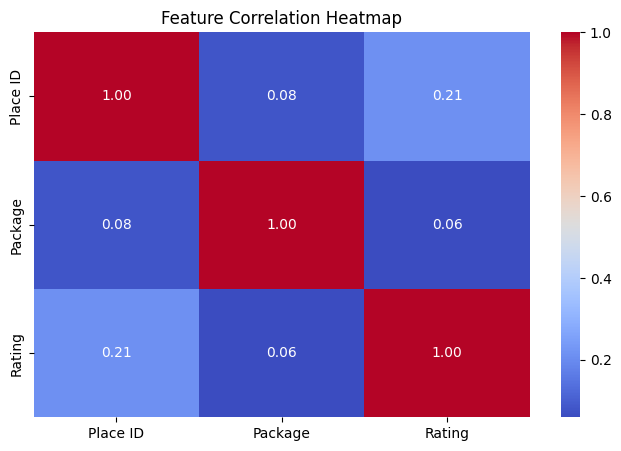

In [17]:
#Heatmap - Correlation Between Numeric Features
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])  

plt.figure(figsize=(8, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


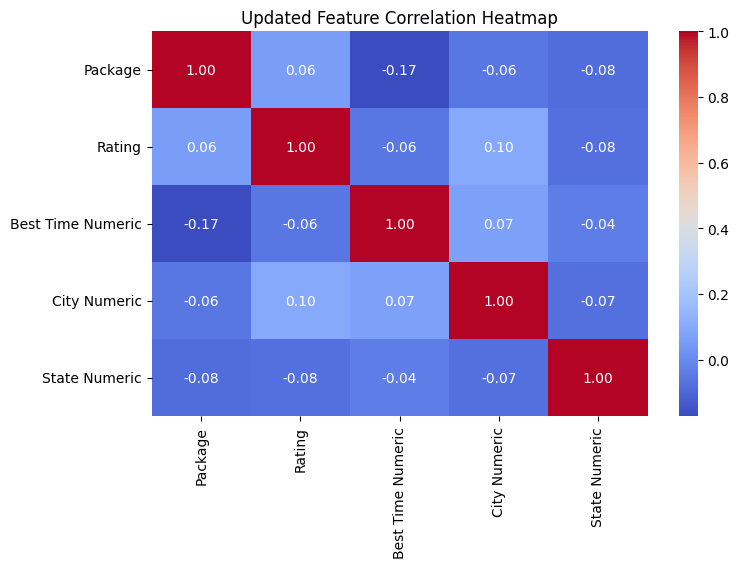

In [29]:
df["Best Time Numeric"] = df["Best time"].astype("category").cat.codes #We use .astype("category").cat.codes to convert each unique value into a number (e.g., Winter → 1, Summer → 2).
df["City Numeric"] = df["city"].astype("category").cat.codes
df["State Numeric"] = df["state"].astype("category").cat.codes

# Select numeric columns for correlation
numeric_df = df[["Package", "Rating", "Best Time Numeric", "City Numeric", "State Numeric"]]

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Updated Feature Correlation Heatmap")
plt.show()


If Package Cost and Rating are correlated, it means expensive places get better reviews.
If Rating and Best Time to Visit have a connection, we can predict the best seasonal trips.